# Super Data Science Club Reto Mensual - 2

## Para este segundo reto tenemos un dataset con informaciones sobre vehiculos donde debemos analizar y tratar de crear un modelo que pueda predecir el precio de vehiculos usados para la compañia.¶

# Exploracion de la data

### Importando las primeras librerias

In [1]:
import numpy as np
import pandas as pd

### Importando el dataset

In [2]:
data = pd.read_csv('E:\Python\Machine Learning\SDS Club Challenges\October Challenge\Data\public_cars.csv')
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30824 entries, 0 to 30823
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30824 non-null  object 
 1   model_name         30824 non-null  object 
 2   transmission       30824 non-null  object 
 3   color              30824 non-null  object 
 4   odometer_value     30824 non-null  int64  
 5   year_produced      30824 non-null  int64  
 6   engine_fuel        30824 non-null  object 
 7   engine_has_gas     30824 non-null  bool   
 8   engine_type        30824 non-null  object 
 9   engine_capacity    30816 non-null  float64
 10  body_type          30824 non-null  object 
 11  has_warranty       30824 non-null  bool   
 12  state              30824 non-null  object 
 13  drivetrain         30824 non-null  object 
 14  feature_0          30824 non-null  bool   
 15  feature_1          30824 non-null  bool   
 16  feature_2          308

In [4]:
data.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      8
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [5]:
data.isnull().sum() / len(data)

manufacturer_name    0.00000
model_name           0.00000
transmission         0.00000
color                0.00000
odometer_value       0.00000
year_produced        0.00000
engine_fuel          0.00000
engine_has_gas       0.00000
engine_type          0.00000
engine_capacity      0.00026
body_type            0.00000
has_warranty         0.00000
state                0.00000
drivetrain           0.00000
feature_0            0.00000
feature_1            0.00000
feature_2            0.00000
feature_3            0.00000
feature_4            0.00000
feature_5            0.00000
feature_6            0.00000
feature_7            0.00000
feature_8            0.00000
feature_9            0.00000
duration_listed      0.00000
price_usd            0.00000
dtype: float64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
odometer_value,30824.0,248803.130515,135760.720763,0.0,158146.5000,250000.0,325000.0,1000000.0
year_produced,30824.0,2002.939690,8.048786,1950.0,1998.0000,2003.0,2009.0,2019.0
engine_capacity,30816.0,2.054232,0.667535,0.2,1.6000,2.0,2.3,7.5
duration_listed,30824.0,80.344407,112.656926,0.0,23.0000,59.0,91.0,2232.0
price_usd,30824.0,6630.598604,6412.213626,1.0,2145.8575,4800.0,8950.0,50000.0


## Haciendo un vistazo rapido podemos destacar algunas cosas de nuestro nuevo dataset:
 - Nos encontramos un dataset mucho mas pequeño que el anterior reto con unos 30,000 registros.
 - Tambien tenemos muchas mas variables, especialmente booleanas, que facilitaran hacer feature engineering.
 - Tenemos muy poca data faltante por lo que podemos tomar la misma decision de retirar estos registros.
 - Con unas estadisticas basicas de las variables tipo numericas vemos que tenemos varios rangos de valores.

# Analisis Exploratorio de la Data (EDA)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Primero observemos la distribucion de nuestro target donde nos muestra que nuestro target tiene una tendencia hacia la izquierda, es decir es mas probable que un vehiculo seleccionado al azar sea de un costo menor a 10,000 dolares.

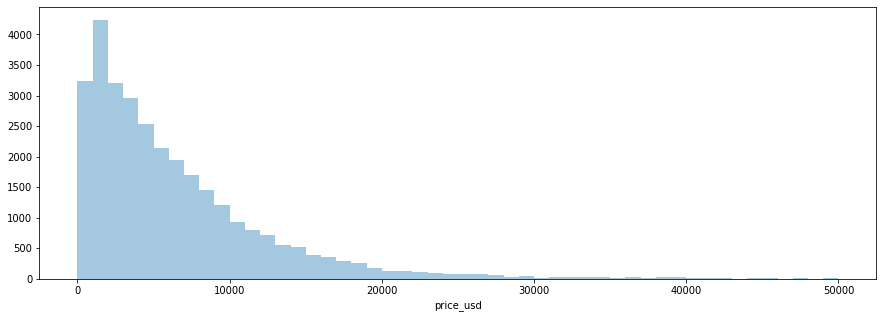

In [16]:
plt.figure(figsize = (15, 5))
sns.distplot(data['price_usd'], kde = False)

### Ahora vamos a ver de forma rapida que tipo de relacion tienen nuestras variables numericas respecto a cada una de ellas. Aqui vemos que con respecto a nuestra Y (precio), con la variable del millero a mayor millas, mas economico el vehiculo (algo muy comun de esperar) y tambien la misma relacion con el año del vehiculo, a mayor año, mas alto el precio, con las ultimas dos al parecer no existe una relacion con nuestra Y. Ya las demas variables entre si no se puede distinguir ninguna relacion entre ellas (lo cual es bueno para este tipo de problemas).

<Figure size 1080x720 with 0 Axes>

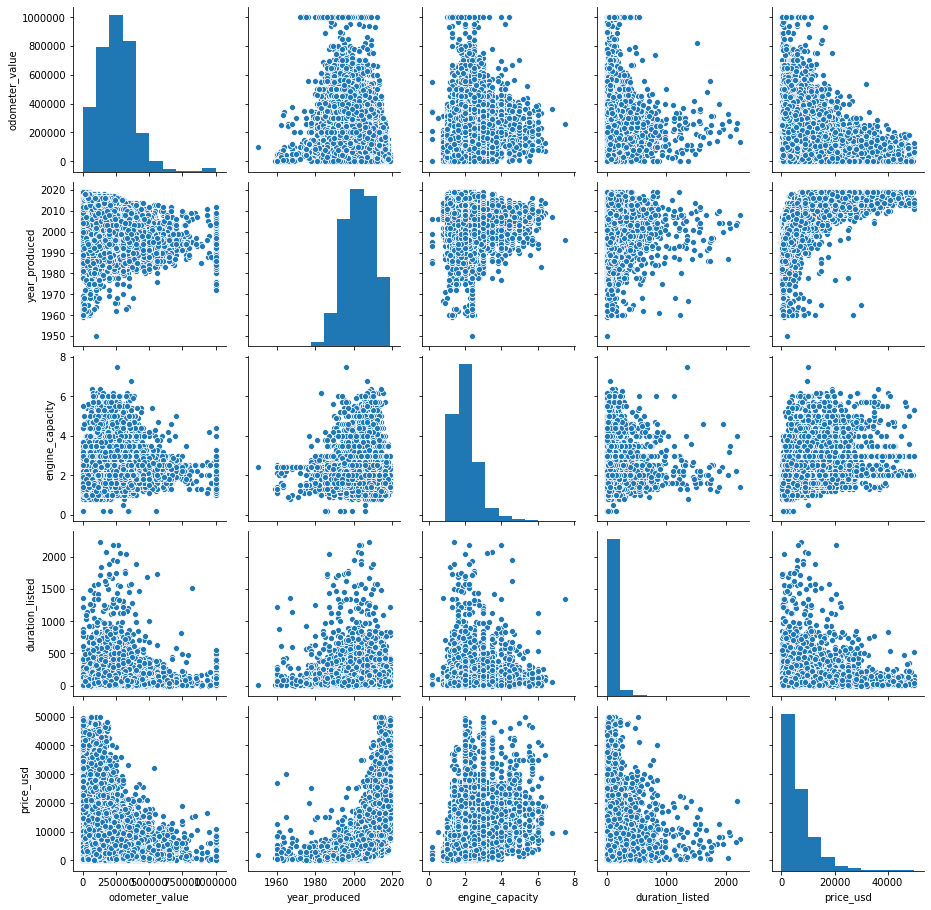

In [29]:
plt.figure(figsize = (15, 10))
sns.pairplot(data[['odometer_value', 'year_produced', 'engine_capacity', 'duration_listed', 'price_usd']])

### Pero para tener una mejor idea de si realmente existe una correlacion entre las variables, es mejor realizar una matriz de correlacion y mostrarla en un mapa de calor, esta matriz se realiza solo con las variables numericas ya que matematicamente las variables categoricas no tendrian una relacion ya que solo tienen valores entre 0 y 1.

In [23]:
#Creamos nuestra matriz de correlacion utilizando solo las variables de numericas
correlation = data[['odometer_value', 'year_produced', 'engine_capacity', 'duration_listed', 'price_usd']].corr()

### Y con nuestra matriz de correlacion mostrada en un mapa de calor podemos observar que realmente existe una alta correlacion entre el millero y el año con nuestra Y, y un poco tambien con la capacidad del motor. Tambien se puede destacar la correlacion que existe entre e millero y el año, donde tambien era de esperar ya que a mayor año, menor las millas recorridas, esto puede causar problemas en el modelo ya que si existen variables con correlacion entre ellas, no aportan a la prediccion de nuestra Y, pero con esto lidiaremos luego, primero seguimos con nuestro EDA.

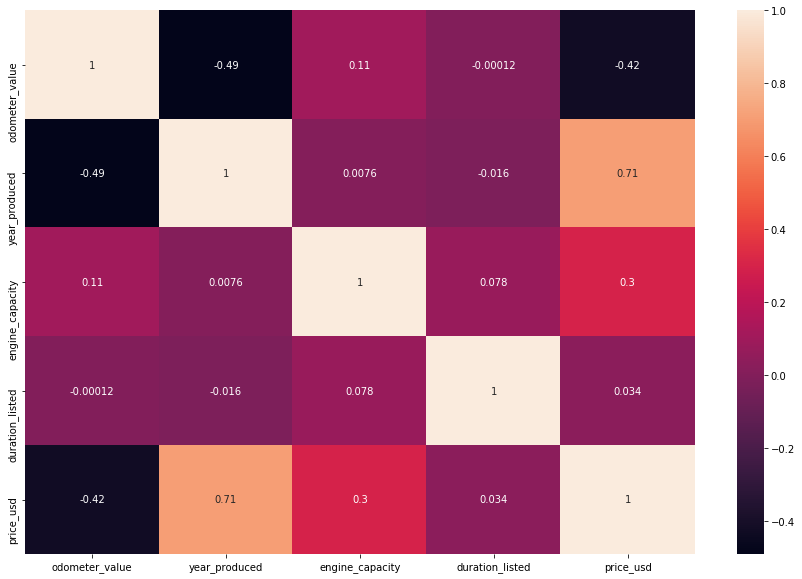

In [26]:
plt.figure(figsize = (15, 10))
sns.heatmap(correlation, annot = True)